## ■ Feature Scaling (특성 스케일링)
- **데이터의 값이 너무 크거나, 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지**
- **또는 예측 값이 범위를 벗어나는 입력데이터의 값에 더 큰 영향을 받는 것을 방지**
- 일반적으로 대부분의 머신러닝과 최적화 알고리즘은 특성의 스케일이 같을 때 훨씬 성능이 좋다.
- 스케일링은 **전처리 과정으로 모든 자료에 선형 변환을 적용** 하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정
- 스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킴.

<hr>

![데이터변환1_표준화](img/데이터변환1_표준화.jpg)

### 정규화 (Normalization)
- 특성의 스케일을 [0, 1] 범위에 맞추는 것

#### 가. MinMaxScaler
- **모든 Feature값이 0~1사이에 있도록 데이터를 재조정**
- 이상치가 있을 경우 변환된 값이 매우 좁은 범위로 압축될 수 있음
- **즉 MinMaxScaler 역시 아웃라이어의 존재에 매우 민감**

#### 나. MaxAbsScaler (절대값)
- **모든 Feature의 절대값이 0~1사이에 있도록 데이터를 재조정 즉 -1 ~ 1사이로 재조정한다.**
- **양수 데이터셋에서는 MinMaxScaler와 유사하게 동작하며 큰 이상치에 민감할 수 있다.**

![minmax_scaler](img/minmax_scaler.jpg)

![Scaler_type](img/Scaler_type.PNG)


### Normalization
#### 1) sklearn.preprocessing :
    - MinMaxScaler()
    - MinAbsScaler()

[[10 12  5  9 29]
 [ 5 19 24 16 21]
 [14 22  3  3 28]
 [19  4  3  6 19]
 [20 11 12 27  2]
 [23  5 22 11 28]] 

mean: 14.4
standard deviation: 8.631724431807742
variance: 74.50666666666667


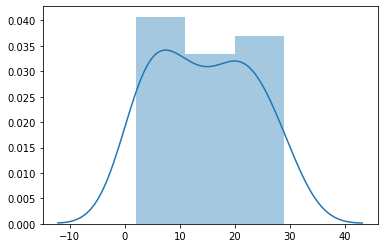

In [3]:
# (0) 데이터생성
import numpy as np

# 여러개 쳐도 나오게
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = np.random.randint(30, size=(6,5))
print(data, '\n')

print('mean:', np.mean(data))
print('standard deviation:', np.std(data))
print('variance:', np.var(data))

import seaborn as sns
sns.distplot(data)

### (1) 직접 계산 최소, 최댓값을 구해서 0~1 범위로 변환

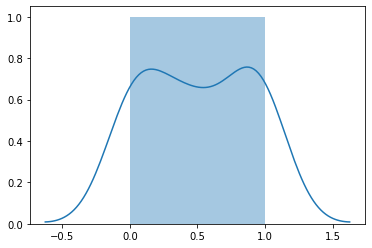

In [7]:
# 정규화 (Normalizing) -> MinMaxScaler 3가지 방법
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, minmax_scale
import seaborn as sns

# 변환 (1) 최소, 최댓값을 구해서 0~1 범위로 변환
X_MinMax = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
sns.distplot(X_MinMax)

### (2)  sklearn.preprocessing.minmax_scale()
- minmax_scale().MinMaxScaler() 를 사용한 최소, 최대 0~1범위 변환

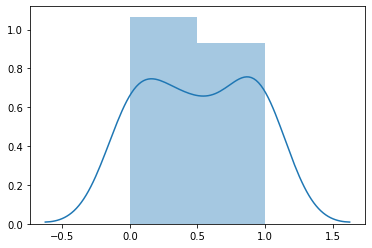

In [8]:
# 변환 (2) MinMaxScaler() 를 사용한 최소, 최대 0~1범위 변환
min_max_scaler = MinMaxScaler()
X_MinMax_train = min_max_scaler.fit_transform(data)
sns.distplot(X_MinMax_train)

### (3) sklearn.preprocessing.minmax_scale()
- minmax_scale()을 사용한 최소, 최대 0~1범위 변환

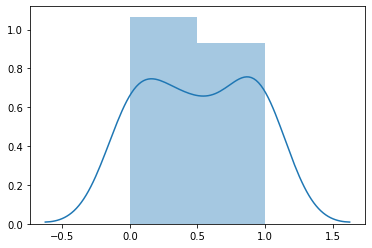

In [9]:
# 변환 (3) sklearn.preprocessing.minmax_scale() 을 사용한 최소, 최대 0~1범위 변환
X_MinMax_scaled = minmax_scale(data, axis=0, copy=True)
sns.distplot(X_MinMax_scaled)